In [50]:
import pandas as pd
import numpy as np

### Revision

In [51]:
# Timestamp
dt = pd.Timestamp('6th jan 2023 8:10')
print(dt)

print(dt.year)
print(dt.month)
print(dt.day)
print(dt.time())


# dt.day_name(): This will return the day of the week as a string, e.g. "Friday".
# dt.hour: This will return the hour value as an integer, e.g. 8.
# dt.minute: This will return the minute value as an integer, e.g. 10.
# dt.second: This will return the second value as an integer, which is 0 since it wasn't specified in the timestamp.
# dt.microsecond: This will return the microsecond value as an integer, which is 0 since it wasn't specified in the timestamp.
# dt.weekday(): This will return the day of the week as an integer, where Monday is 0 and Sunday is 6.
# dt.is_leap_year: This will return a boolean indicating whether the year is a leap year or not. In this case, it will be True since 2023 is not a leap year.
# dt.to_pydatetime(): This will convert the timestamp to a Python datetime object, which can be useful for performing additional datetime operations using Python's built-in datetime module.

2023-01-06 08:10:00
2023
1
6
08:10:00


In [19]:
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])

DatetimeIndex(['2023-01-06 08:10:00', '2023-01-07 08:10:00',
               '2023-01-08 08:10:00'],
              dtype='datetime64[ns]', freq=None)

In [23]:
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')

DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

0      Friday
1    Saturday
2    Saturday
dtype: object

### Timedelta Object

Represents a duration, the difference between two dates or times.

In [24]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2023 8:20:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')

t2 - t1

Timedelta('20 days 01:39:46')

In [25]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [26]:
# Arithmetic
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [27]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

____
____

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [52]:
google = pd.read_csv('E:\DataScienceCampus_ineuron\Pandas\Datasets\google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [53]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [54]:
google['Date'] = pd.to_datetime(google['Date'])

In [55]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [56]:
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


In [57]:
google.set_index('Date',inplace=True)

In [58]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [59]:
# fetch a specific date
google.loc['2021-12-30']

Open           2929.000000
High           2941.250000
Low            2915.169922
Close          2920.050049
Adj Close      2920.050049
Volume       648900.000000
Name: 2021-12-30 00:00:00, dtype: float64

In [60]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [61]:
google.index.month_name()

Index(['August', 'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'September',
       ...
       'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May'],
      dtype='object', name='Date', length=4471)

In [62]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [63]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2


In [73]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta

google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name
Date,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January


In [88]:
google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


## plotting

### single plot or single column

<AxesSubplot: xlabel='Date'>

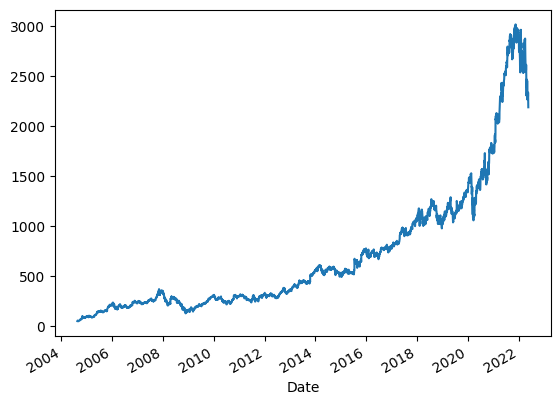

In [89]:
google['Close'].plot()

### pair plots all col with date

In [90]:
temp_df = google.iloc[:,0:-3]
temp_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


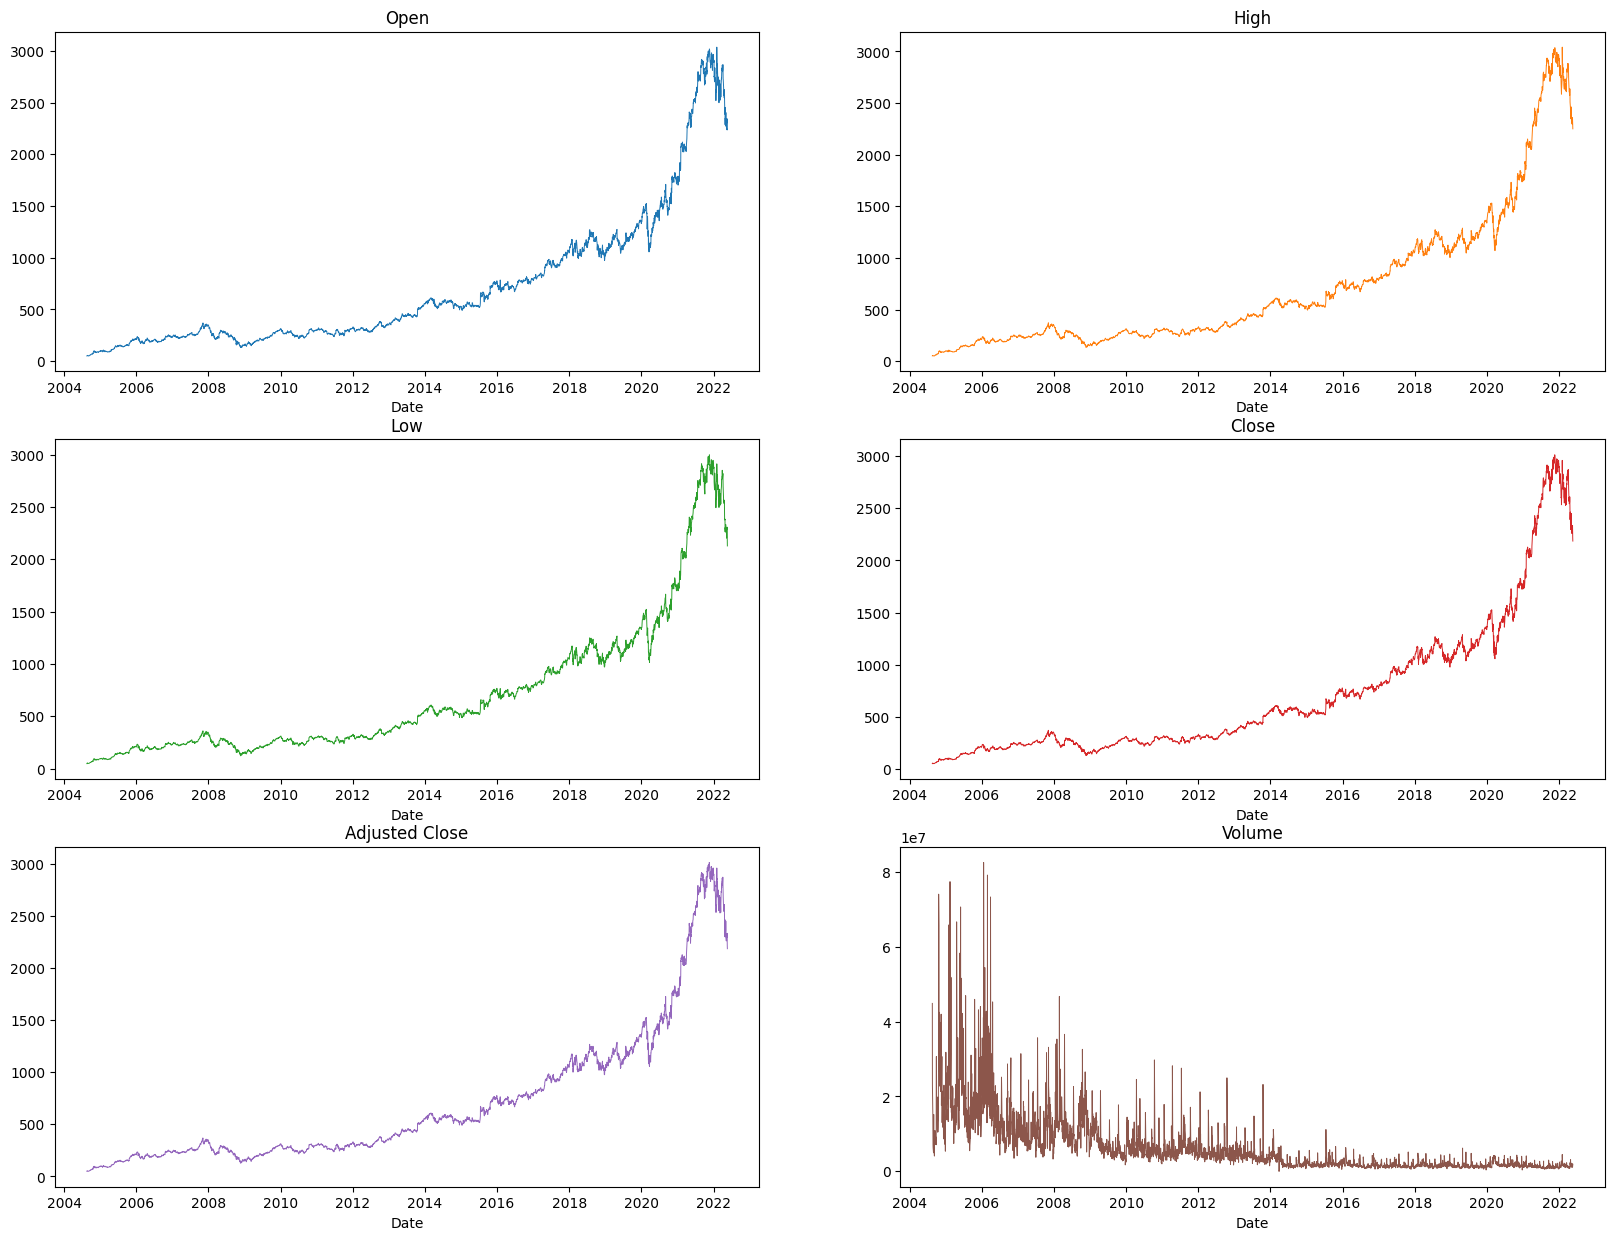

In [93]:
## plotting all with time

ax = temp_df.plot(subplots=True,
                    layout=(3, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,15),
                      title=['Open', 'High', 'Low', 'Close','Adjusted Close', 'Volume'])

In [95]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2


<AxesSubplot: xlabel='Date'>

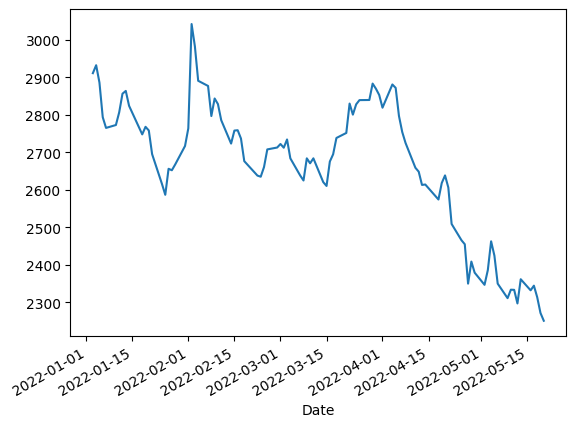

In [101]:
# yearly trend
google.loc['2022']['High'].plot()

<AxesSubplot: xlabel='Date'>

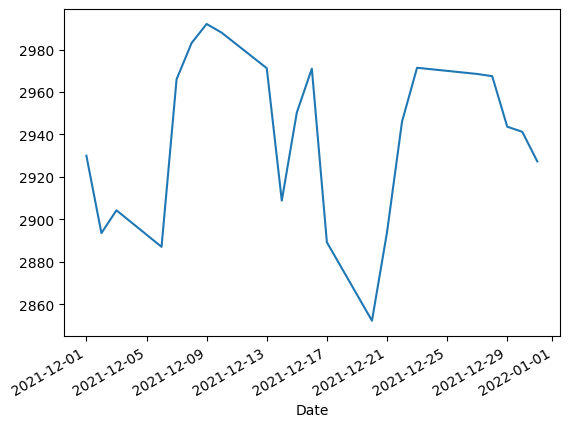

In [102]:
# monthly trend
google.loc['2021-12']['High'].plot()

<AxesSubplot: xlabel='Date'>

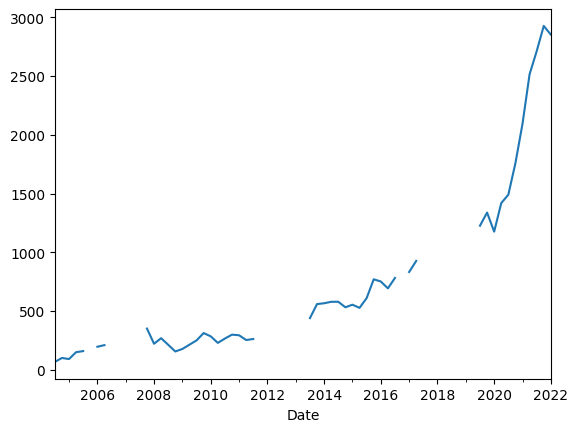

In [127]:
# Quaterly trend
google.asfreq('Q')['High'].plot()

<AxesSubplot: xlabel='month_name'>

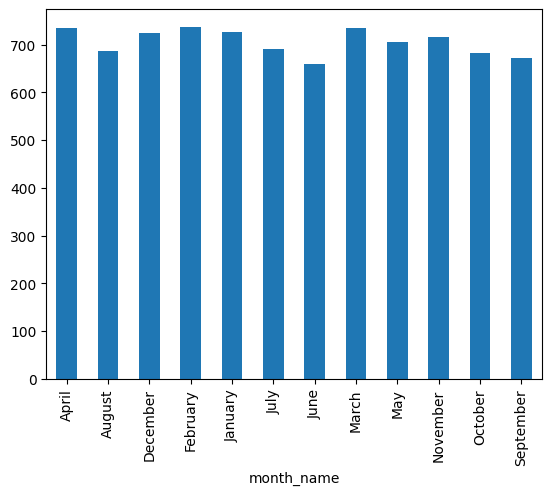

In [118]:
google.groupby('month_name')['Close'].mean().plot(kind='bar')

<AxesSubplot: xlabel='quarter'>

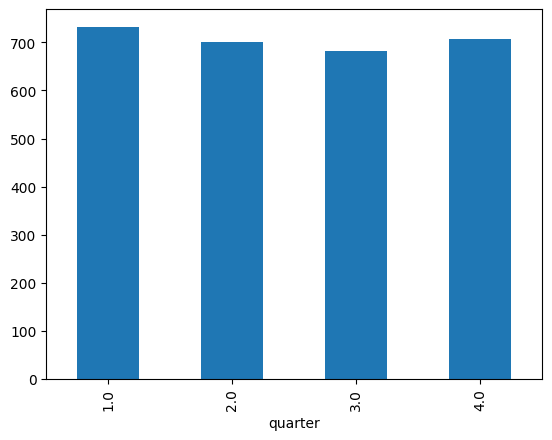

In [119]:
# quaterly trend
google.groupby('quarter')['Close'].mean().plot(kind='bar')

### frequency vs asfreqeuncy

In [117]:
# frequency ---None default
print(google.index)                     #--default fequency None
google.asfreq('D')                   #freq set to daily hence NaN where missing the days in data
google = google.asfreq('B')
print(google.index)                               #--> frquency is B for Buissness days

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')
DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')


In [ ]:
# asfreq
google.asfreq('6H',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0


### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<AxesSubplot: xlabel='Date'>

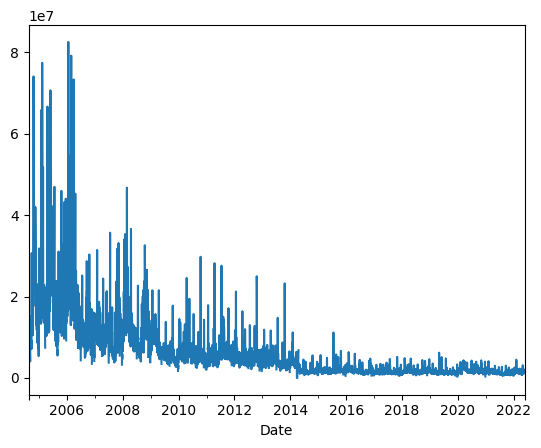

In [132]:
# original
google['Volume'].plot()

#Problem with origial frequency noise is too great can not analyse properly

<AxesSubplot: xlabel='Date'>

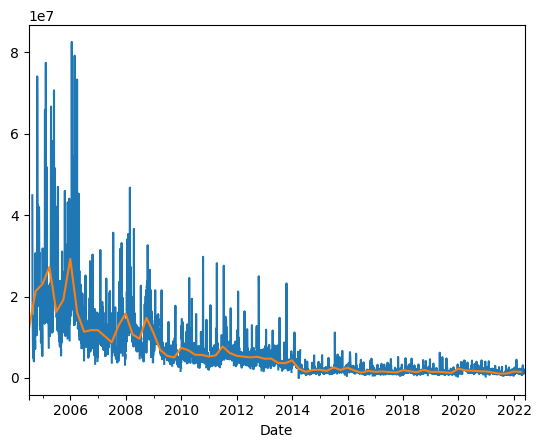

In [142]:
# downsampling
google['Volume'].plot()
google['Volume'].resample('Q').mean().plot()

<AxesSubplot: xlabel='Date'>

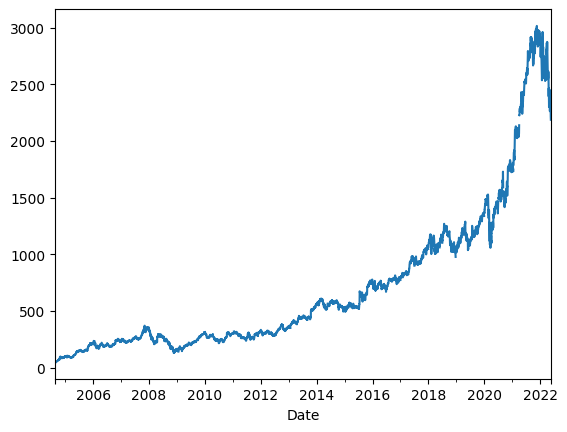

In [145]:
google['Close'].plot()

<AxesSubplot: xlabel='Date'>

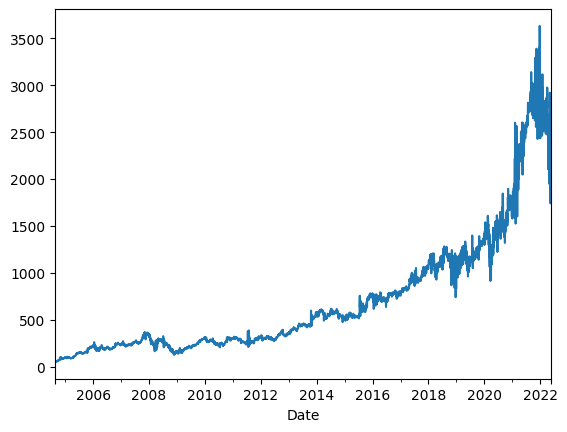

In [146]:
# Upsampling
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

<AxesSubplot: xlabel='Date'>

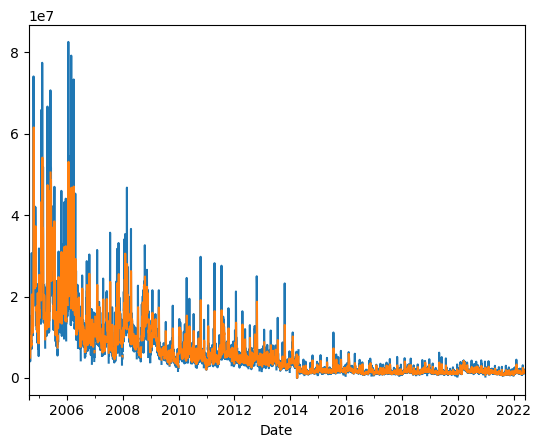

In [156]:
# Normal rolling average or moving average
google['Volume'].plot()
google['Volume'].rolling(3).mean().plot()

<AxesSubplot: xlabel='Date'>

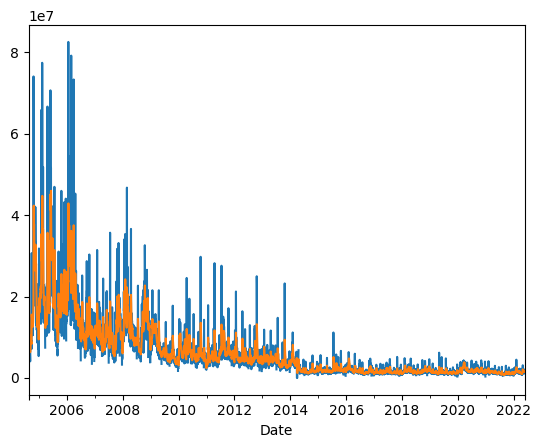

In [158]:
# exponential moving average
google['Volume'].plot()
google['Volume'].ewm(3).mean().plot()

### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [161]:
# shift example
df = pd.read_csv('E:\DataScienceCampus_ineuron\Pandas\Datasets\login.csv',header=None)
df

,0,1,2,3
0,1,466,2017-01-07 18:24:07,Unnamed: 3
1,2,466,2017-01-07 18:24:55,NaN
2,3,458,2017-01-07 18:25:18,NaN
3,4,458,2017-01-07 18:26:21,NaN
4,5,592,2017-01-07 19:09:59,NaN
...,...,...,...,...
2998,2999,1307,2018-01-04 10:48:28,183.82.121.201
2999,3000,1230,2018-01-04 11:22:00,47.247.147.114
3000,3001,1307,2018-01-04 13:13:44,183.82.121.201
3001,3002,1307,2018-01-04 13:13:45,183.82.121.201


In [163]:
df = df[[1,2]]
df


,1,2
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59
...,...,...
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45


In [164]:
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [167]:
df.shift(1).head()
#Note shifted by one position

,user_id,login_time
0,NaN,None
1,466.0,2017-01-07 18:24:07
2,466.0,2017-01-07 18:24:55
3,458.0,2017-01-07 18:25:18
4,458.0,2017-01-07 18:26:21


In [168]:
# opossite direction shifting
df.tail()

,user_id,login_time
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45
3002,1224,2018-01-04 14:10:04


In [170]:
df.shift(-1).tail()

,user_id,login_time
2998,1230.0,2018-01-04 11:22:00
2999,1307.0,2018-01-04 13:13:44
3000,1307.0,2018-01-04 13:13:45
3001,1224.0,2018-01-04 14:10:04
3002,NaN,None


In [172]:
user_df = df[df['user_id'] == 458]
user_df.head()

,user_id,login_time
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
9,458,2017-01-09 11:13:12
10,458,2017-01-09 11:34:02
25,458,2017-01-10 12:14:11


### user login time diff using shift

In [173]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 2 to 1018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     208 non-null    int64         
 1   login_time  208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.9 KB


C:\Users\kkark\AppData\Local\Temp\ipykernel_8380\897488481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [174]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

C:\Users\kkark\AppData\Local\Temp\ipykernel_8380\4028882259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('0 days 17:29:22.053140096')